In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm
from sklearn.model_selection import KFold

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

In [13]:
import openpyxl

filename = "test_forest.xlsx"
wb = openpyxl.load_workbook(filename)
sheet = wb.active
for r in range(1, sheet.max_row):
    for c in range(2, sheet.max_column):
        print(sheet.cell(r, c).value, end=" ")
    print()


auto_forward WTI DGS2 DGS10 TIPS 
DOWN 81.74 1.01 3.77 1.43 
UP 83.12 1.01 3.85 1.48 
UP 82.6 1.03 3.85 1.44 
UP 82.74 0.96 3.83 1.41 
UP 82.54 0.95 3.85 1.47 
UP 80.79 0.92 3.74 1.35 
UP 79.66 0.97 3.8 1.43 
UP 79.35 0.94 3.76 1.4 
UP 77.96 0.89 3.7 1.34 
UP 78.98 0.93 3.73 1.35 
UP 77.42 0.92 3.68 1.31 
UP 75.84 0.87 3.62 1.29 
UP 74.25 0.84 3.62 1.31 
UP 74.9 0.86 3.66 1.33 
UP 74.67 0.87 3.65 1.31 
UP 73.64 0.9 3.66 1.35 
UP 73.62 0.87 3.68 1.35 
UP 72.85 0.82 3.63 1.3 
UP 74.41 0.86 3.68 1.29 
UP 77.21 0.86 3.67 1.26 
UP 76.96 0.88 3.73 1.3 
UP 73.13 0.8 3.62 1.27 
UP 71.15 0.77 3.59 1.32 
UP 71.87 0.79 3.62 1.35 
UP 73.71 0.84 3.67 1.37 
UP 74.48 0.91 3.72 1.44 
UP 75.23 0.91 3.73 1.47 
UP 74.11 0.84 3.69 1.46 
UP 76.98 0.82 3.66 1.42 
UP 77.27 0.87 3.74 1.46 
UP 78.97 0.9 3.79 1.48 
UP 79.77 0.95 3.78 1.52 
UP 80.04 0.91 3.8 1.55 
UP 78.61 0.87 3.69 1.5 
UP 79.75 0.87 3.7 1.51 
UP 77.99 0.82 3.64 1.51 
UP 79.72 0.81 3.61 1.48 
UP 78.71 0.8 3.61 1.46 
UP 79.62 0.8 3.62 1.46 
UP 8

In [39]:
x=pd.read_excel('test_forest.xlsx')
y=pd.read_excel('y_forest.xlsx')

In [40]:
x.head()

,WTI,DGS2,DGS10,TIPS,VIX
0,81.74,1.01,3.77,1.43,19.35
1,83.12,1.01,3.85,1.48,19.16
2,82.60,1.03,3.85,1.44,19.06
3,82.74,0.96,3.83,1.41,18.13
4,82.54,0.95,3.85,1.47,17.55


In [41]:
y.head()

,auto_forward
0,DOWN
1,UP
2,UP
3,UP
4,UP


In [42]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTI     3299 non-null   float64
 1   DGS2    3299 non-null   float64
 2   DGS10   3299 non-null   float64
 3   TIPS    3299 non-null   float64
 4   VIX     3299 non-null   float64
dtypes: float64(5)
memory usage: 129.0 KB


In [43]:
x.describe()

,WTI,DGS2,DGS10,TIPS,VIX
count,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,71.379172,1.077881,2.280712,0.255641,18.732510
std,22.678069,1.049861,0.749102,0.676470,7.259671
min,-36.980000,0.090000,0.520000,-1.190000,9.140000
25%,51.840000,0.310000,1.770000,-0.210000,13.655000
50%,71.000000,0.670000,2.260000,0.400000,16.910000
75%,92.190000,1.510000,2.790000,0.700000,21.770000
max,123.640000,5.050000,4.250000,1.740000,82.690000


In [47]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3,random_state=2021)

# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (2309, 5)
Test set dimension is (990, 5)


In [48]:
rfc = RandomForestClassifier(n_estimators=10,random_state=2021)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2021)

In [49]:
# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:0.9913


Test set에 대한 성능
정확도:0.8414


100%|██████████| 50/50 [01:23<00:00,  1.68s/it]


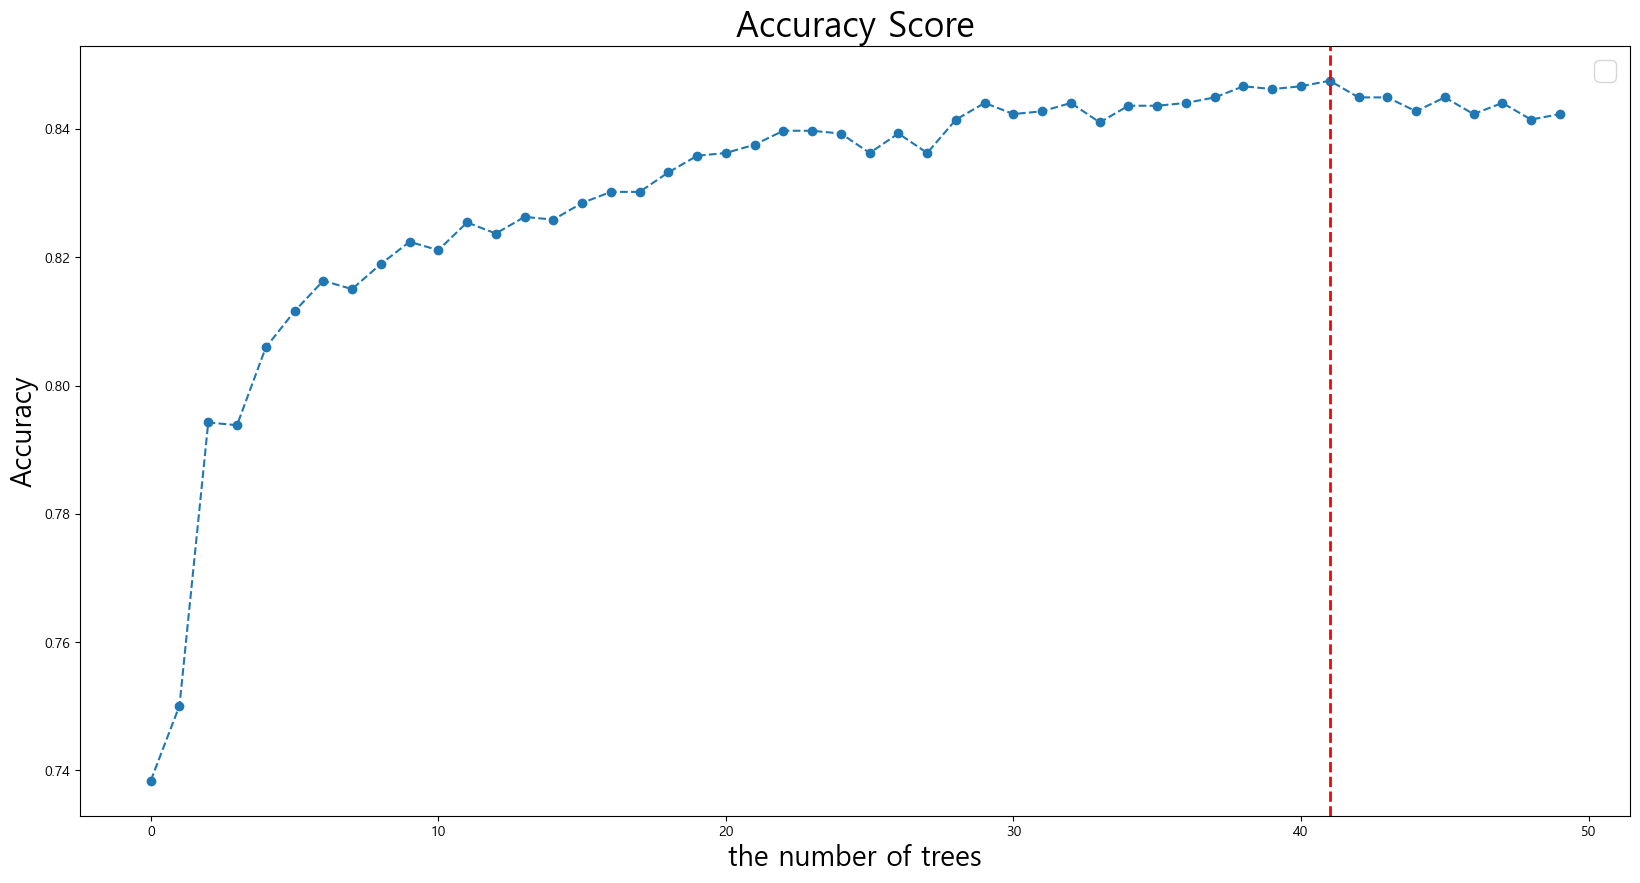

In [50]:
cv_scores = []
estimator_list =[i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=2021)
    score = cross_val_score(rfc, X_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)

best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize=(20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list,cv_scores, marker='o', linestyle='dashed')
plt.xlabel("the number of trees", fontsize=20 )
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy Score", fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2)
plt.show()

In [51]:
print(f"최적의 tree개수:{(cv_scores.index(max(cv_scores)))+1}")
print("\n")  
print("Train set에 대한 성능 (10 fold cross validation)")  
print(f"정확도:{max(cv_scores):0.4f}")  

최적의 tree개수:42


Train set에 대한 성능 (10 fold cross validation)
정확도:0.8476


In [52]:
rfc = RandomForestClassifier(n_estimators=42, n_jobs=-1, random_state=2021)
rfc.fit(X_train, y_train)

# Train set에 대한 성능
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:0.9996


Test set에 대한 성능
정확도:0.8576


In [53]:
rfc = RandomForestClassifier(random_state=2021)
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [10,15,20],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [50, 60, 70]},
             verbose=1)

In [54]:
# 최적의 하이퍼 파라미터 셋
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 200,
 'n_estimators': 50}

In [55]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by='mean_test_score', ascending=False)
print(result_table[['params', 'mean_test_score']])

                                                params  mean_test_score
150  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.842355
159  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.842355
160  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.838022
151  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.838022
161  {'criterion': 'entropy', 'max_depth': 20, 'max...         0.836288
..                                                 ...              ...
139  {'criterion': 'entropy', 'max_depth': 20, 'max...              NaN
140  {'criterion': 'entropy', 'max_depth': 20, 'max...              NaN
141  {'criterion': 'entropy', 'max_depth': 20, 'max...              NaN
142  {'criterion': 'entropy', 'max_depth': 20, 'max...              NaN
143  {'criterion': 'entropy', 'max_depth': 20, 'max...              NaN

[162 rows x 2 columns]


In [56]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=200,
                       n_estimators=50, random_state=2021)

In [57]:
# Train set에 대한 성능
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = best_rfc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

Train set에 대한 성능
정확도:0.9809


Test set에 대한 성능
정확도:0.8646


In [90]:
recall = recall_score(y_true = y_test, y_pred =y_pred, pos_label='DOWN', average='binary') ## 민감도
precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ')  

ValueError: pos_label=1 is not a valid label. It should be one of ['DOWN', 'UP']

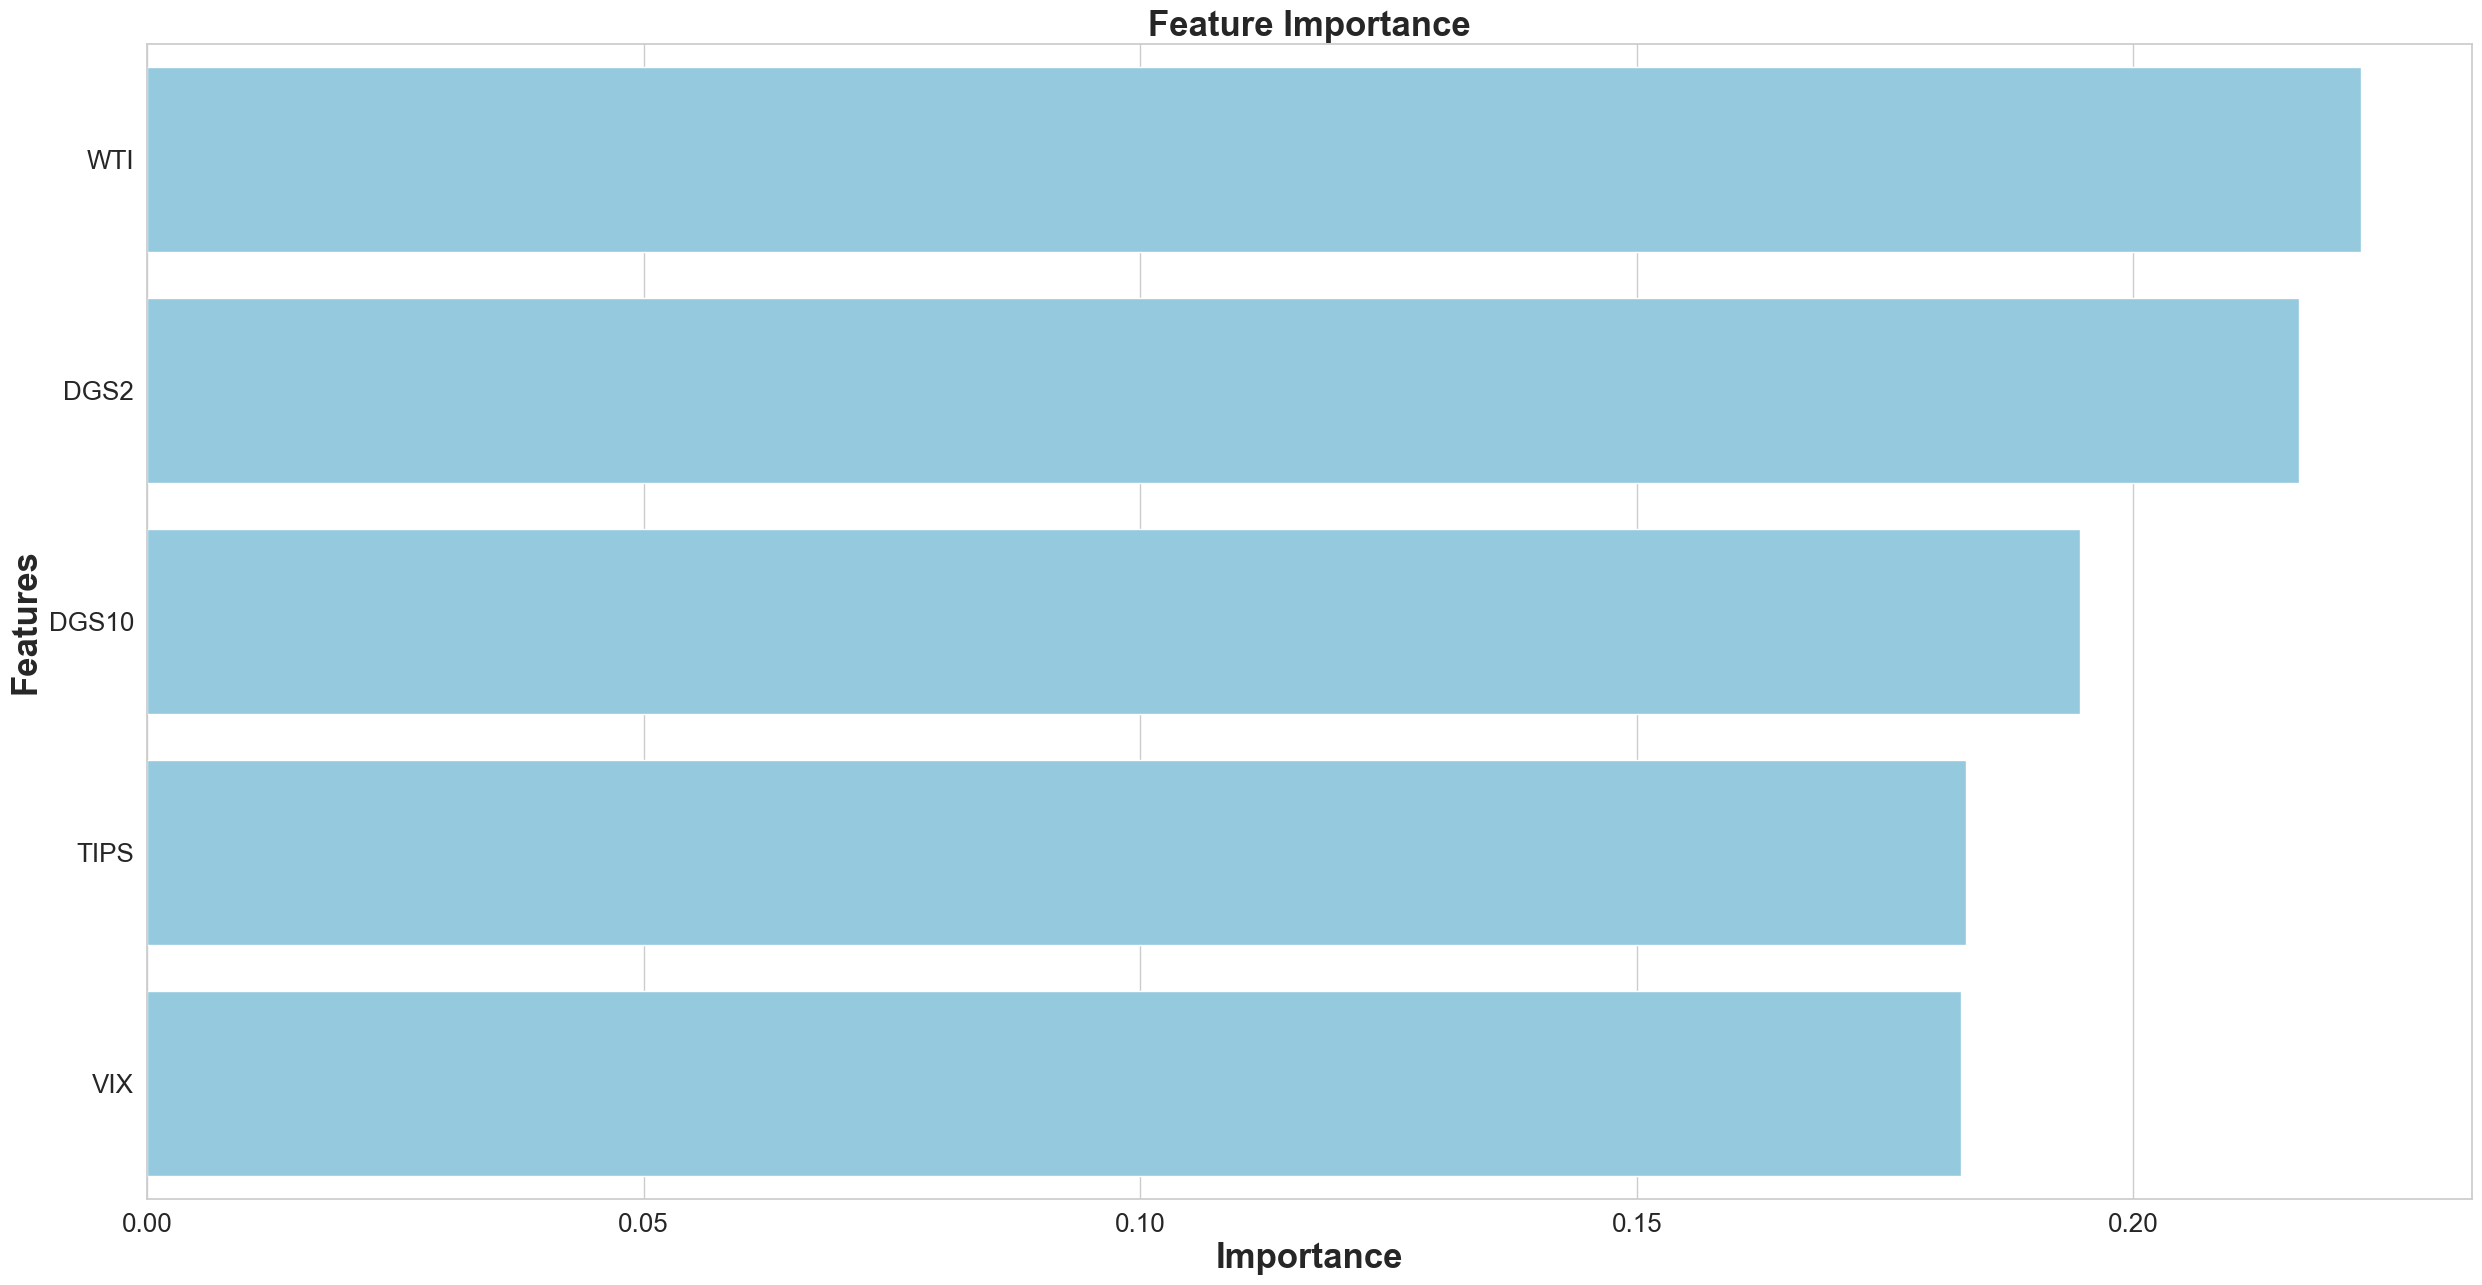

None

,Features,Gini-Importance
0,WTI,0.222968
1,DGS2,0.216654
2,DGS10,0.194630
3,TIPS,0.183121
4,VIX,0.182627


In [60]:
feats = {}
for feature, importance in zip(x, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [68]:

# 데이터 프레임 형태로 변환
x=pd.read_excel('test_forest.xlsx')
y=pd.read_excel('y_forest.xlsx')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)

# Random Forest Regressor
rfr = RandomForestRegressor(random_state=2021)
param_grid = {
    'max_depth': [10, 50, 100, 200],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['mae', 'mse']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=-1, scoring='r2')
CV_rfr.fit(X_train, y_train)

best_rfr = CV_rfr.best_estimator_
best_rfr.fit(X_train, y_train)

y_pred = best_rfr.predict(X_test)

r2score = r2_score(y_true = y_test, y_pred =y_pred) ## R-squared score
friedman_mse = mean_squared_error(y_true = y_test, y_pred =y_pred) ## MSE (Mean Squared Error)
mae = mean_absolute_error(y_true = y_test, y_pred =y_pred) ## MAE (Mean Absolute Error)

print('Random Forest Regressor')
print(f"R2 score:{r2score:0.4f}",f"MSE:{friedman_mse:0.4f}",f"MAE:{mae:0.4f}", sep='  |  ')  

Fitting 10 folds for each of 24 candidates, totalling 240 fits


ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'absolute_error', 'friedman_mse', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'poisson', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'friedman_mse', 'squared_error', 'absolute_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'absolute_error', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'absolute_error', 'squared_error', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'poisson', 'absolute_error', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'poisson', 'absolute_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'DOWN'

--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Samsung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 424, in fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'UP'
